# This notebook compares the results from Thermobar to those calculated using the spreadsheet hosted on Keith Putirka's personal website
(http://www.fresnostate.edu/csm/ees/faculty-staff/putirka.html)


In [29]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

# Inconsistencies to be aware of
 - Putirka spreadsheets ignore Fe3+ 
 - Neave spreadsheet uses Fe3+ certain things, e.g. Mg# of the liquid, and the Kd cpx-liq exchange, but not for others, e.g, temperature equations where instead of reffing the Mg# cell, use MgO/(MgO+FeO)
 - Molar mass in Putirka for FeO is 71.8464. Causes tiny discrepencies vs. 71.844 used here.
 - Can see spreadsheet from Putirka website at bencharking/
Putirka2008_Spreadsheet_Cpx_Liquid#
_________________________________
- Masotta spreadsheet, doesn't sum Cr as a cation fraction, also doesn't divide by 3 (oxygens) when calculating Cr on basis of 23 oxygens. Confirmed by email that the calibration used the approach of Putirka, so for benchmarks here, edited his spreadsheet to match the approach of putirka (see Masotta_spreadsheet_adapted_for_correct_CrCalculation.xlsx)
 

## Loading in data to test on

In [30]:
out=pt.import_excel('Python_Liq_CpxBarometers_Test.xlsx', sheet_name="SomeFe3+")
my_input=out['my_input']
myCPXs1=out['Cpxs']
myLiquids1=out['Liqs']

In [31]:
myCPXs1

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,51.5,0.50,3.70,5.18,0.09,15.8,22.8,0.24,0,0.66,0
1,50.3,0.73,4.12,5.83,0.00,15.0,22.7,0.24,0,0.28,1
2,47.3,1.75,7.85,6.51,0.14,13.1,22.5,0.25,0,0.22,2
3,51.1,0.63,4.41,5.66,0.13,15.6,22.6,0.23,0,0.27,3
4,51.0,0.56,4.14,7.33,0.20,14.4,22.4,0.31,0,0.09,4


# Clinopyroxene-Liquid tests using Masotta equations for alkaline melts

## Masotta Talk1

Youve selected a P-independent function


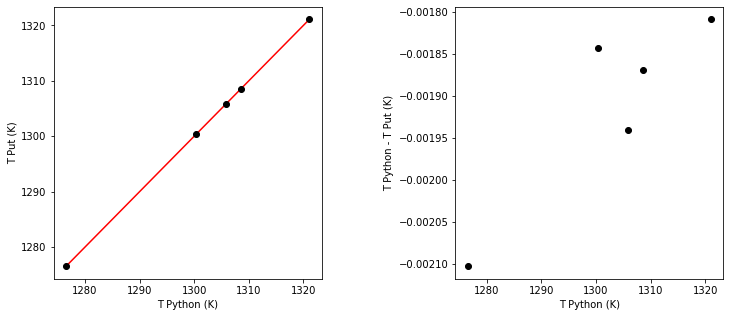

In [32]:
T_Put=my_input['Masotta2013_Talk1'] 
T_py=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Mas2013_eqTalk1", P=my_input['T_K'])
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put (K)')
ax2.set_xlabel('T Python (K)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)


## Masotto Talk2

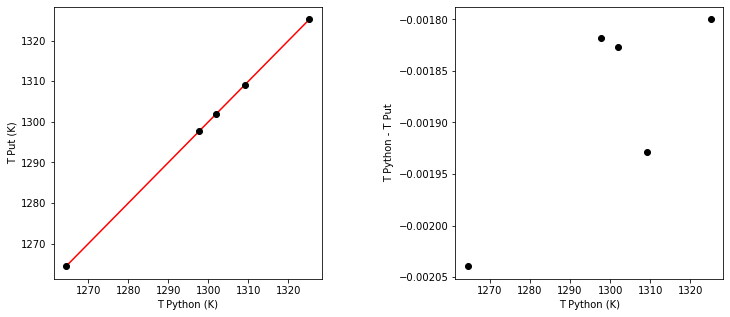

In [33]:
T_Put=my_input['Masotta2013_Talk2'] 
T_py=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Mas2013_eqTalk2", P=my_input['P_kbar'])
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put')
ax2.set_xlabel('T Python (K)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Masotta Talk33

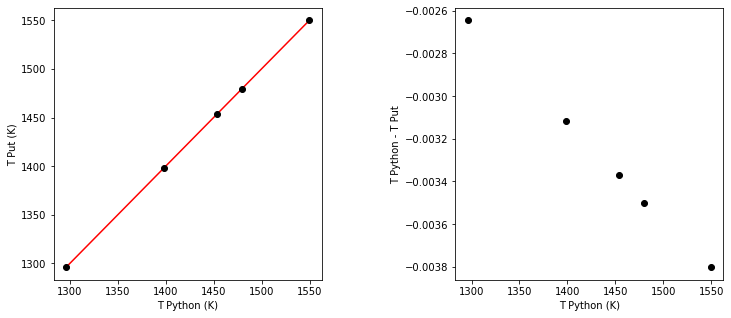

In [34]:
T_Put=my_input['Masotta2013_Talk33'] 
T_py=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Mas2013_eqalk33", 
                               P=my_input['P_kbar'])
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put')
ax2.set_xlabel('T Python (K)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Masotta Talk2012 
- Note, calculates Kd Fe-Mg Cpx-Liq using all Fe2+ in spreadsheets, so here first have to set Fe3FeT_Liq=0

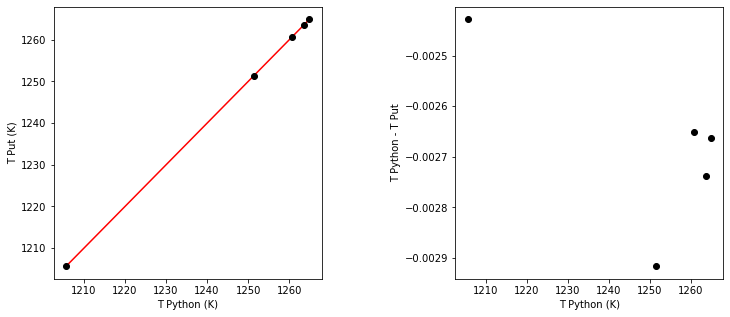

In [35]:
T_Put=my_input['Masotta_Talk2012'] 
T_py=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Mas2013_Talk2012")

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put')
ax2.set_xlabel('T Python (K)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Masotta P alk 1 using the results from equation Talk1 in the spreadsheet of Masotta

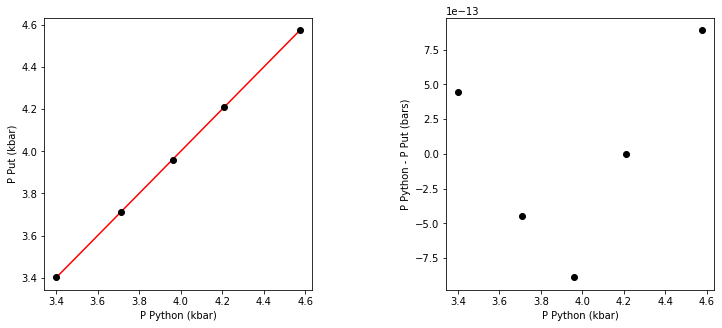

In [36]:
# Uses Temp from Talk1
P_Put=my_input['Masotta_Palk1_usingTalk1']
P_py=pt.calculate_cpx_liq_press(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationP="P_Mas2013_eqPalk1", 
                                  T=my_input['Masotta2013_Talk1'])
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(P_Put), np.max(P_Put)], [np.min(P_Put), np.max(P_Put)], '-r')
ax1.plot(P_py, P_Put, 'ok')
ax1.set_xlabel('P Python (kbar)')
ax1.set_ylabel('P Put (kbar)')
ax2.plot(P_py, 1000*(P_py-P_Put), 'ok')
ax2.set_ylabel('P Python - P Put (bars)')
ax2.set_xlabel('P Python (kbar)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Masotta Palk2 using temp from Talk1 from input spreadsheet

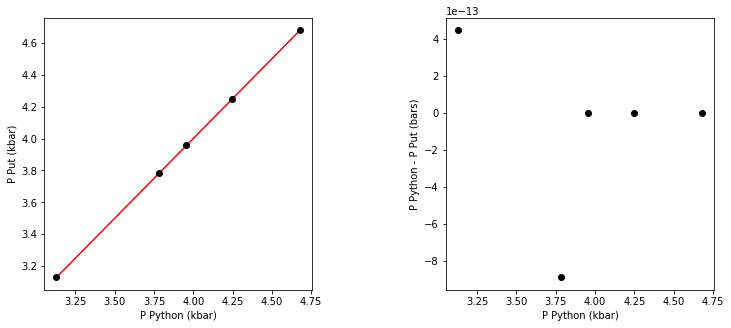

In [37]:
# Uses Temp from Talk1
P_Put=my_input['Masotta_Palk2_usingTalk1']
P_py=pt.calculate_cpx_liq_press(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationP="P_Mas2013_eqPalk2", 
                                  T=my_input['Masotta2013_Talk1'])
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(P_Put), np.max(P_Put)], [np.min(P_Put), np.max(P_Put)], '-r')
ax1.plot(P_py, P_Put, 'ok')
ax1.set_xlabel('P Python (kbar)')
ax1.set_ylabel('P Put (kbar)')
ax2.plot(P_py, 1000*(P_py-P_Put), 'ok')
ax2.set_ylabel('P Python - P Put (bars)')
ax2.set_xlabel('P Python (kbar)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Masotta Palk32c using temp from Talk33 from input spreadsheet

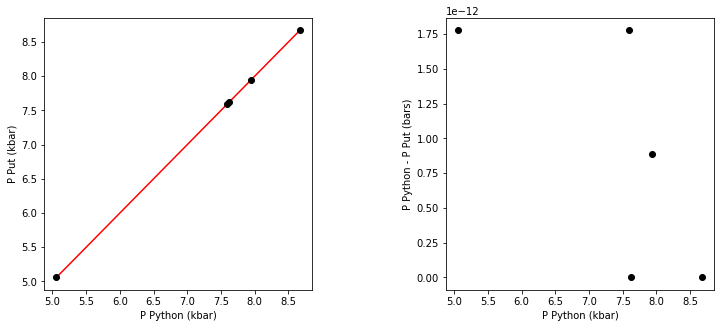

In [38]:
P_Put=my_input['Masotta_Palk32_usingT_alk33']
P_py=pt.calculate_cpx_liq_press(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationP="P_Mas2013_eqalk32c", 
                                  T=my_input['Masotta2013_Talk33'])
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(P_Put), np.max(P_Put)], [np.min(P_Put), np.max(P_Put)], '-r')
ax1.plot(P_py, P_Put, 'ok')
ax1.set_xlabel('P Python (kbar)')
ax1.set_ylabel('P Put (kbar)')
ax2.plot(P_py, 1000*(P_py-P_Put), 'ok')
ax2.set_ylabel('P Python - P Put (bars)')
ax2.set_xlabel('P Python (kbar)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Masotto et al. 2013 Palk2012

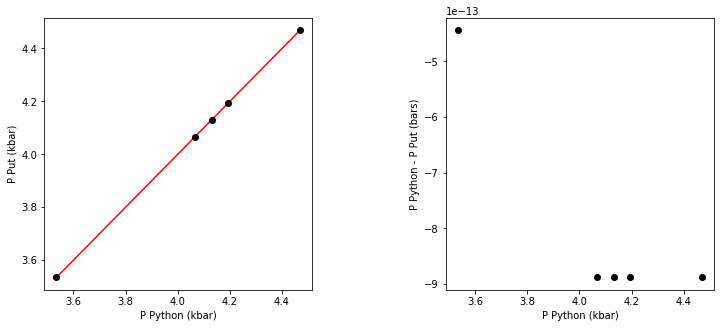

In [39]:

P_Put=my_input['Masotta_Palk2012']
P_py=pt.calculate_cpx_liq_press(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationP="P_Mas2013_Palk2012")
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(P_Put), np.max(P_Put)], [np.min(P_Put), np.max(P_Put)], '-r')
ax1.plot(P_py, P_Put, 'ok')
ax1.set_xlabel('P Python (kbar)')
ax1.set_ylabel('P Put (kbar)')
ax2.plot(P_py, 1000*(P_py-P_Put), 'ok')
ax2.set_ylabel('P Python - P Put (bars)')
ax2.set_xlabel('P Python (kbar)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

# CPX-Liquid tests

 ## Testing pairs of thermometers and barometers 

In [40]:
#my_input, myLabels, Experimental_press_temp1, myLiquids1, myCPXs1,  myOls1, myFspars1, myOPXs1=pw.import_excel_unknowns('Python_Liq_CpxBarometers_Test.xlsx', sheetname="SomeFe3+")
out=pt.import_excel('Python_Liq_CpxBarometers_Test.xlsx', sheet_name="SomeFe3+")
my_input=out['my_input']
myCPXs1=out['Cpxs']
myLiquids1=out['Liqs']

Text(0, 0.5, 'Spreadsheet Press')

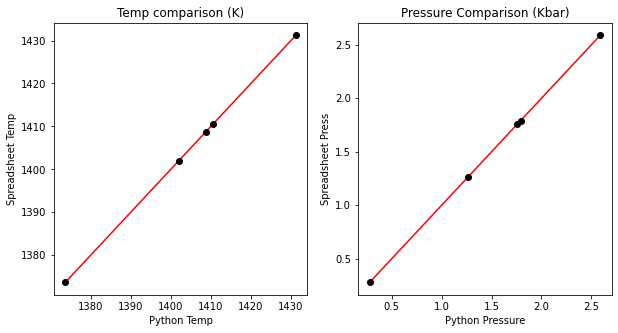

In [41]:

PT_out=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1, cpx_comps=myCPXs1, equationP="P_Put1996_eqP1", equationT="T_Put1996_eqT2")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Temp comparison (K)')
ax1.plot((np.min(my_input['SOLVE_T1996_Eq2_Pdependent']), np.max(my_input['SOLVE_T1996_Eq2_Pdependent'])), (np.min(my_input['SOLVE_T1996_Eq2_Pdependent']), np.max(my_input['SOLVE_T1996_Eq2_Pdependent'])), '-r')
ax1.plot(PT_out['T_K_calc'], my_input['SOLVE_T1996_Eq2_Pdependent'], 'ok')
ax2.set_title('Pressure Comparison (Kbar)')
ax2.plot((np.min(my_input['SOLVE_P_Put1996_eq1']), np.max(my_input['SOLVE_P_Put1996_eq1'])), (np.min(my_input['SOLVE_P_Put1996_eq1']), np.max(my_input['SOLVE_P_Put1996_eq1'])), '-r')
ax2.plot(PT_out['P_kbar_calc'], my_input['SOLVE_P_Put1996_eq1'], 'ok')
ax1.set_xlabel('Python Temp')
ax2.set_xlabel('Python Pressure')
ax1.set_ylabel('Spreadsheet Temp')
ax2.set_ylabel('Spreadsheet Press')

## Putirka 2008 Eq 33 and Neave and Putirka 2017

Text(0, 0.5, 'Spreadsheet')

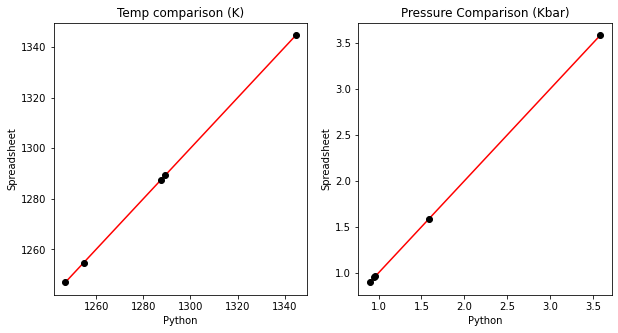

In [42]:
PT_out=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1, cpx_comps=myCPXs1, equationP="P_Neave2017", equationT="T_Put2008_eq33")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Temp comparison (K)')
ax1.plot((np.min(my_input['SolveT_P2008_Eq33_P_NP2017']), np.max(my_input['SolveT_P2008_Eq33_P_NP2017'])), (np.min(my_input['SolveT_P2008_Eq33_P_NP2017']), np.max(my_input['SolveT_P2008_Eq33_P_NP2017'])), '-r')
ax1.plot(PT_out['T_K_calc'], my_input['SolveT_P2008_Eq33_P_NP2017'], 'ok')
ax2.set_title('Pressure Comparison (Kbar)')
ax2.plot((np.min(my_input['SolveP_P2008_Eq33_P_NP2017']), np.max(my_input['SolveP_P2008_Eq33_P_NP2017'])), (np.min(my_input['SolveP_P2008_Eq33_P_NP2017']), np.max(my_input['SolveP_P2008_Eq33_P_NP2017'])), '-r')
ax2.plot(PT_out['P_kbar_calc'], my_input['SolveP_P2008_Eq33_P_NP2017'], 'ok')
ax1.set_xlabel('Python')
ax2.set_xlabel('Python')
ax1.set_ylabel('Spreadsheet')
ax2.set_ylabel('Spreadsheet')

### Testing equilibrium match the Neave spreadsheet

Using Fe3FeT from input file to calculate Kd Fe-Mg


KeyError: 'Delta_CaTs'

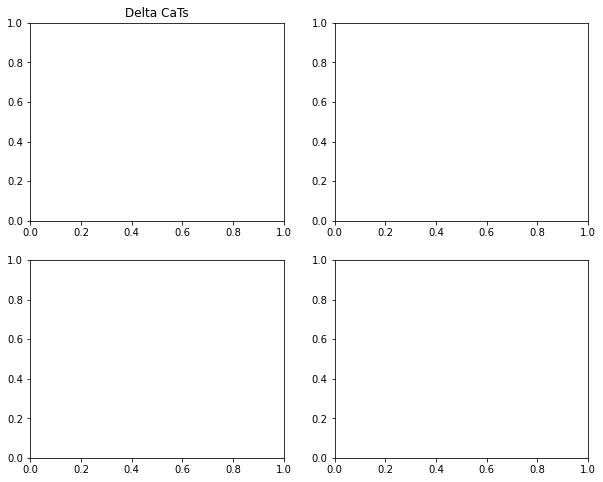

In [43]:
PT_out=pt.calculate_cpx_liq_press_temp(liq_comps=myLiquids1, cpx_comps=myCPXs1, equationP="P_Neave2017", equationT="T_Put2008_eq33", eq_tests=True)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
ax1.set_title('Delta CaTs')
ax1.plot(PT_out['Delta_CaTs'], my_input['Neave2019_EqTests_DeltaCaTs'], 'ok')
ax1.plot([0, 0.1], [0, 0.1], '-r')
ax1.set_xlabel('Python')
ax1.set_ylabel('Neave Spreadsheet')

ax2.set_title('Delta Kd')
ax2.plot(PT_out['Delta_Kd_Put2008'], my_input['Neave2019_EqTests_DeltaKd'], 'ok')
ax2.plot([0, 0.17], [0, 0.17], '-r')
ax2.set_xlabel('Python')
ax2.set_ylabel('Neave Spreadsheet')

ax3.set_title('Delta EnFs')
ax3.plot(PT_out['Delta_EnFs'], my_input['Neave2019_EqTests_DeltaEnFs'], 'ok')
ax3.plot([0, 0.05], [0, 0.05], '-r')
ax3.set_xlabel('Python')
ax3.set_ylabel('Neave Spreadsheet')

ax4.set_title('Delta DiHd')
ax4.plot(PT_out['Delta_DiHd'], my_input['Neave2019_EqTests_DeltaDiHd'], 'ok')
ax4.plot([0, 0.15], [0, 0.15], '-r')
ax4.set_xlabel('Python')
ax4.set_ylabel('Neave Spreadsheet')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=0.5)

# Testing barometers by inputting a fixed temperature (1400 K for these examples)


## Put 1996 Equation 1

In [ ]:
FixedT_Put1996_Eq1=pt.calculate_cpx_liq_press(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationP="P_Put1996_eqP1", T=my_input['T_K'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedT_P_Put1996_eq1']), np.max(my_input['FixedT_P_Put1996_eq1'])), (np.min(my_input['FixedT_P_Put1996_eq1']), np.max(my_input['FixedT_P_Put1996_eq1'])), '-r')
ax1.plot(FixedT_Put1996_Eq1, my_input['FixedT_P_Put1996_eq1'], 'ok')
ax2.plot(FixedT_Put1996_Eq1, 1000*(FixedT_Put1996_Eq1-my_input['FixedT_P_Put1996_eq1']), 'ok')
ax1.set_xlabel('Python P (kbar)')
ax1.set_ylabel('Putirka Spreadsheet P (kbar)')
ax2.set_xlabel('Python P (kbar)')
ax2.set_ylabel('Python-Putirka Spreadsheet (bars)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Put 2003

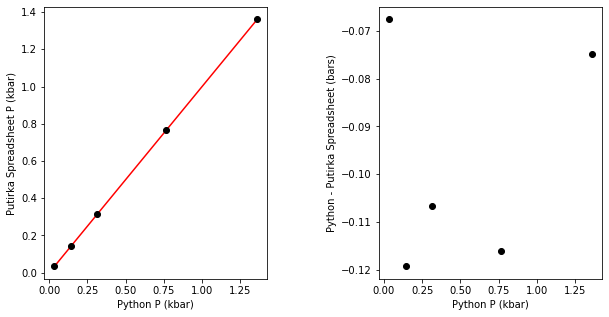

In [44]:
FixedT_P_Put2003=pt.calculate_cpx_liq_press(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationP="P_Put2003", T=my_input['T_K'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedT_P_Put2003']), np.max(my_input['FixedT_P_Put2003'])), (np.min(my_input['FixedT_P_Put2003']), np.max(my_input['FixedT_P_Put2003'])), '-r')
ax1.plot(FixedT_P_Put2003, my_input['FixedT_P_Put2003'], 'ok')
ax2.plot(FixedT_P_Put2003,1000*(FixedT_P_Put2003-my_input['FixedT_P_Put2003']), 'ok')
ax1.set_xlabel('Python P (kbar)')
ax1.set_ylabel('Putirka Spreadsheet P (kbar)')
ax2.set_xlabel('Python P (kbar)')
ax2.set_ylabel('Python - Putirka Spreadsheet (bars)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Putirka 2008 Equation 30

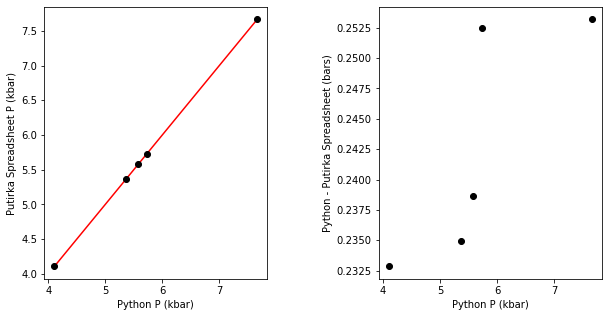

In [45]:
FixedT_P_Put2008_eq30=pt.calculate_cpx_liq_press(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationP="P_Put2008_eq30", T=my_input['T_K'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedT_P_Put2008_eq30']), np.max(my_input['FixedT_P_Put2008_eq30'])), (np.min(my_input['FixedT_P_Put2008_eq30']), np.max(my_input['FixedT_P_Put2008_eq30'])), '-r')
ax1.plot(FixedT_P_Put2008_eq30, my_input['FixedT_P_Put2008_eq30'], 'ok')
ax2.plot(FixedT_P_Put2008_eq30,1000*(FixedT_P_Put2008_eq30-my_input['FixedT_P_Put2008_eq30']), 'ok')
ax1.set_xlabel('Python P (kbar)')
ax1.set_ylabel('Putirka Spreadsheet P (kbar)')
ax2.set_xlabel('Python P (kbar)')
ax2.set_ylabel('Python - Putirka Spreadsheet (bars)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Putirka 2008 Equation 31

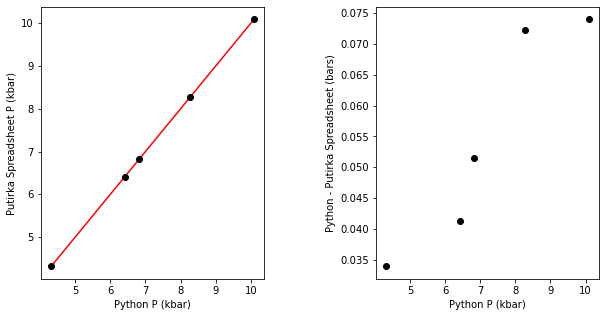

In [46]:
FixedT_P_Put2008_eq31=pt.calculate_cpx_liq_press(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationP="P_Put2008_eq31", T=my_input['T_K'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedT_P_Put2008_eq31']), np.max(my_input['FixedT_P_Put2008_eq31'])), (np.min(my_input['FixedT_P_Put2008_eq31']), np.max(my_input['FixedT_P_Put2008_eq31'])), '-r')
ax1.plot(FixedT_P_Put2008_eq31, my_input['FixedT_P_Put2008_eq31'], 'ok')
ax2.plot(FixedT_P_Put2008_eq31,1000*(FixedT_P_Put2008_eq31-my_input['FixedT_P_Put2008_eq31']), 'ok')
ax1.set_xlabel('Python P (kbar)')
ax1.set_ylabel('Putirka Spreadsheet P (kbar)')
ax2.set_xlabel('Python P (kbar)')
ax2.set_ylabel('Python - Putirka Spreadsheet (bars)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

In [47]:
FixedT_P_Put2008_eq31

0     4.310762
1     6.815694
2    10.092211
3     6.408608
4     8.267363
dtype: float64

# Putirka et al. 2008 - Eq 32c

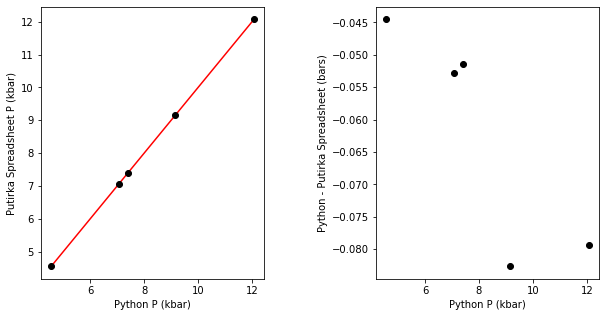

In [48]:
# P_Put2008_Eq32c
FixedT_P_Put2008_eq32c=pt.calculate_cpx_liq_press(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationP="P_Put2008_eq32c", T=my_input['T_K'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedT_P_Put2008_eq32c']), np.max(my_input['FixedT_P_Put2008_eq32c'])), (np.min(my_input['FixedT_P_Put2008_eq32c']), np.max(my_input['FixedT_P_Put2008_eq32c'])), '-r')
ax1.plot(FixedT_P_Put2008_eq32c, my_input['FixedT_P_Put2008_eq32c'], 'ok')
ax2.plot(FixedT_P_Put2008_eq32c,1000*(FixedT_P_Put2008_eq32c-my_input['FixedT_P_Put2008_eq32c']), 'ok')
ax1.set_xlabel('Python P (kbar)')
ax1.set_ylabel('Putirka Spreadsheet P (kbar)')
ax2.set_xlabel('Python P (kbar)')
ax2.set_ylabel('Python - Putirka Spreadsheet (bars)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Neave and Putirka, 2017

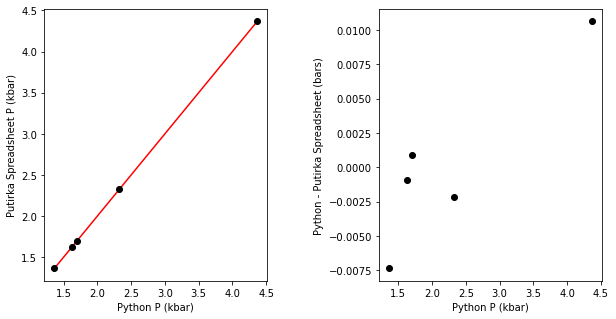

In [49]:
FixedT_P_NP2017=pt.calculate_cpx_liq_press(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationP="P_Neave2017", T=my_input['T_K'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedT_P_NP2017']), np.max(my_input['FixedT_P_NP2017'])), (np.min(my_input['FixedT_P_NP2017']), np.max(my_input['FixedT_P_NP2017'])), '-r')
ax1.plot(FixedT_P_NP2017, my_input['FixedT_P_NP2017'], 'ok')
ax2.plot(FixedT_P_NP2017,1000*(FixedT_P_NP2017-my_input['FixedT_P_NP2017']), 'ok')
ax1.set_xlabel('Python P (kbar)')
ax1.set_ylabel('Putirka Spreadsheet P (kbar)')
ax2.set_xlabel('Python P (kbar)')
ax2.set_ylabel('Python - Putirka Spreadsheet (bars)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

# Put 1996 Equation 1

# Testing thermometers by inputting a fixed (or specified) pressure
- Can see spreadsheet from Putirka website at bencharking/Putirka_Cpx_Liquid_Spreadsheet.xlsx

## Equation 1 Putirka 1996 (P independent)

Youve selected a P-independent function


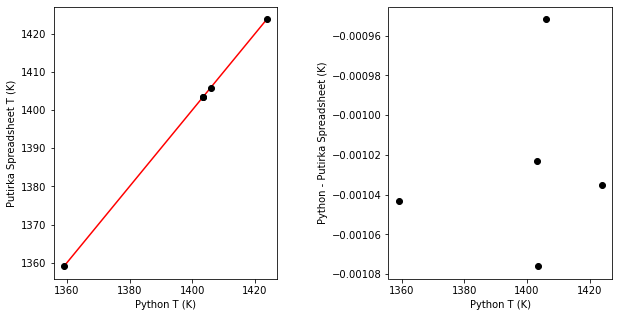

In [50]:
P_indep_P1996_Eq1=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Put1996_eqT1", P=my_input['T_K'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['P_Independent_P1996_Eq1']), np.max(my_input['P_Independent_P1996_Eq1'])), (np.min(my_input['P_Independent_P1996_Eq1']), np.max(my_input['P_Independent_P1996_Eq1'])), '-r')
ax1.plot(P_indep_P1996_Eq1, my_input['P_Independent_P1996_Eq1'], 'ok')
ax2.plot(P_indep_P1996_Eq1,P_indep_P1996_Eq1-my_input['P_Independent_P1996_Eq1'], 'ok')
ax1.set_xlabel('Python T (K)')
ax1.set_ylabel('Putirka Spreadsheet T (K)')
ax2.set_xlabel('Python T (K)')
ax2.set_ylabel('Python - Putirka Spreadsheet (K)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Equation 2 Putirka 1996 (P dependent)

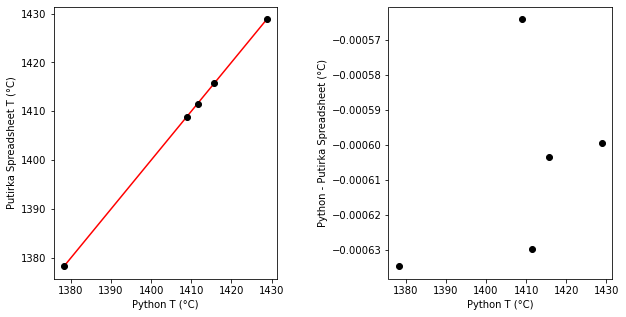

In [51]:
P_dep_P1996_Eq2=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Put1996_eqT2", P=10*my_input['P_GPa'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedP_P_Dependent_P1996_Eq2']), np.max(my_input['FixedP_P_Dependent_P1996_Eq2'])), (np.min(my_input['FixedP_P_Dependent_P1996_Eq2']), np.max(my_input['FixedP_P_Dependent_P1996_Eq2'])), '-r')
ax1.plot(P_dep_P1996_Eq2, my_input['FixedP_P_Dependent_P1996_Eq2'], 'ok')
ax2.plot(P_dep_P1996_Eq2,P_dep_P1996_Eq2-my_input['FixedP_P_Dependent_P1996_Eq2'], 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (°C)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python - Putirka Spreadsheet (°C)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Putirka 1999 Cpx-Saturation

In [52]:
# Can't find exact equation, so althugoh Mg/Mg+Fe term may be Mg#, doesnt calculate it like that in Putirka spreadsheet, so haven't used Fe3+ here. 

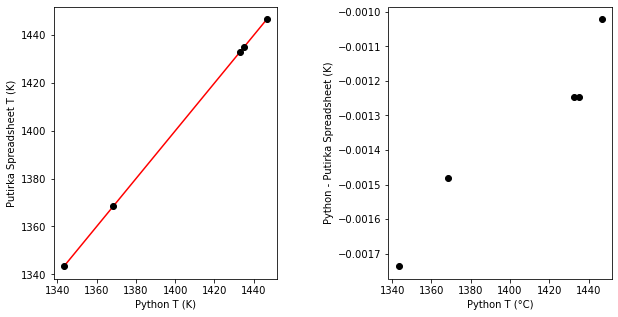

In [53]:
PP_1999_cpx_sat=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Put1999", P=10*my_input['P_GPa'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedP_CpxSat_P1999']), np.max(my_input['FixedP_CpxSat_P1999'])), (np.min(my_input['FixedP_CpxSat_P1999']), np.max(my_input['FixedP_CpxSat_P1999'])), '-r')
ax1.plot(PP_1999_cpx_sat, my_input['FixedP_CpxSat_P1999'], 'ok')
ax2.plot(PP_1999_cpx_sat,PP_1999_cpx_sat-my_input['FixedP_CpxSat_P1999'], 'ok')
ax1.set_xlabel('Python T (K)')
ax1.set_ylabel('Putirka Spreadsheet T (K)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python - Putirka Spreadsheet (K)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Putirka 2003

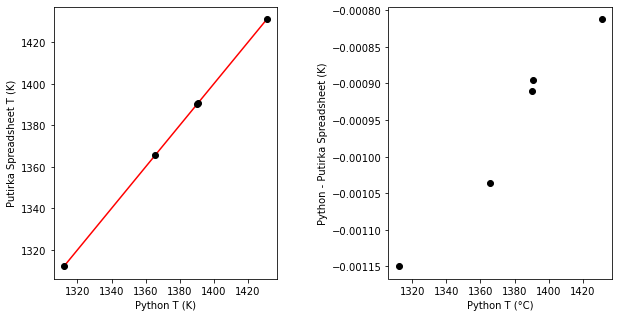

In [54]:
P_2003=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Put2003", P=10*my_input['P_GPa'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedP_P2003']), np.max(my_input['FixedP_P2003'])), (np.min(my_input['FixedP_P2003']), np.max(my_input['FixedP_P2003'])), '-r')
ax1.plot(P_2003, my_input['FixedP_P2003'], 'ok')
ax2.plot(P_2003,P_2003-my_input['FixedP_P2003'], 'ok')
ax1.set_xlabel('Python T (K)')
ax1.set_ylabel('Putirka Spreadsheet T (K)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python - Putirka Spreadsheet (K)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Equation 33 Putirka 2008

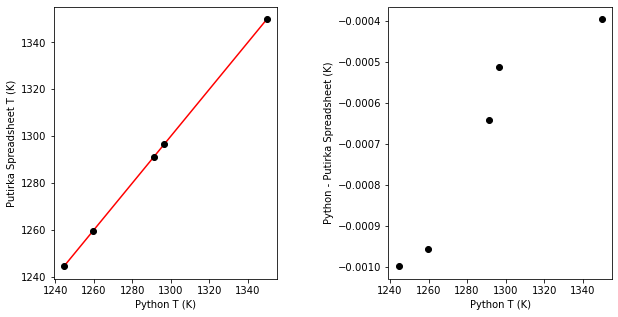

In [55]:
Eq33_FixedP=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Put2008_eq33", P=10*my_input['P_GPa'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedP_T_Eq33']), np.max(my_input['FixedP_T_Eq33'])), (np.min(my_input['FixedP_T_Eq33']), np.max(my_input['FixedP_T_Eq33'])), '-r')
ax1.plot(Eq33_FixedP, my_input['FixedP_T_Eq33'], 'ok')
ax2.plot(Eq33_FixedP, Eq33_FixedP-my_input['FixedP_T_Eq33'], 'ok')
ax1.set_xlabel('Python T (K)')
ax1.set_ylabel('Putirka Spreadsheet T (K)')
ax2.set_xlabel('Python T (K)')
ax2.set_ylabel('Python - Putirka Spreadsheet (K)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Equation 34 Putirka 2008

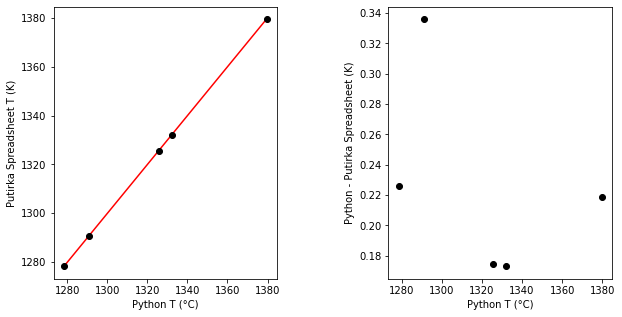

In [57]:
Eq34_FixedP=pt.calculate_liq_only_temp( liq_comps=myLiquids1, equationT="T_Put2008_eq34_cpx_sat", P=10*my_input['P_GPa'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['FixedP_T_Eq34']), np.max(my_input['FixedP_T_Eq34'])), (np.min(my_input['FixedP_T_Eq34']), np.max(my_input['FixedP_T_Eq34'])), '-r')
ax1.plot(Eq34_FixedP, my_input['FixedP_T_Eq34'], 'ok')
ax2.plot(Eq34_FixedP, Eq34_FixedP-my_input['FixedP_T_Eq34'], 'ok')
ax1.set_xlabel('Python T (°C)')
ax1.set_ylabel('Putirka Spreadsheet T (K)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python - Putirka Spreadsheet (K)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Brugman and Till, 2019
-Slight discprencies with published spreadsheet because P2O5 is not used in their liquid input, which affects the cation fractions calculated for the liquid. This python code is a perfect match if P2O5 in the input is set to zero (shown below) by making a copy of the liquid. Within uncertainty, particularly for more silicic compositions, where P2O5 should be very low. 

In [58]:
Temp_BT_2019=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Brug2019")
Temp_BT_2019

<ipython-input-58-640952400efa>:1: UserWarning: Some inputted CPX compositions have Cpx Mg#>0.65;.
  Temp_BT_2019=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Brug2019")
<ipython-input-58-640952400efa>:1: UserWarning: Some inputted CPX compositions have Al2O3>7 wt%;.
  Temp_BT_2019=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Brug2019")
<ipython-input-58-640952400efa>:1: UserWarning: Some inputted Liq compositions have  SiO2<70 wt%;
  Temp_BT_2019=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Brug2019")
c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\clinopyroxene_thermobarometry.py:734: UserWarning: which is outside the recomended calibration range of Brugman and Till (2019)
  w.warn("which is outside the recomended calibration range of Brugman and Till (2019)")


0    2070.839417
1    1905.832392
2    1475.513348
3    1831.506437
4    1302.097694
dtype: float64

<ipython-input-59-67a3c20ba3e0>:2: UserWarning: Some inputted CPX compositions have Cpx Mg#>0.65;.
  Temp_BT_2019=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Brug2019")-273.15
<ipython-input-59-67a3c20ba3e0>:2: UserWarning: Some inputted CPX compositions have Al2O3>7 wt%;.
  Temp_BT_2019=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Brug2019")-273.15
<ipython-input-59-67a3c20ba3e0>:2: UserWarning: Some inputted Liq compositions have  SiO2<70 wt%;
  Temp_BT_2019=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Brug2019")-273.15
<ipython-input-59-67a3c20ba3e0>:7: UserWarning: Some inputted CPX compositions have Cpx Mg#>0.65;.
  Temp_BT_2019_NoP205=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1_noP2O5, equationT="T_Brug2019")-273.15
<ipython-input-59-67a3c20ba3e0>:7: UserWarning: Some inputted CPX compositions have Al2O3>7 wt%;.
  Temp_BT_2019_NoP205=pt.calculate_cpx_liq

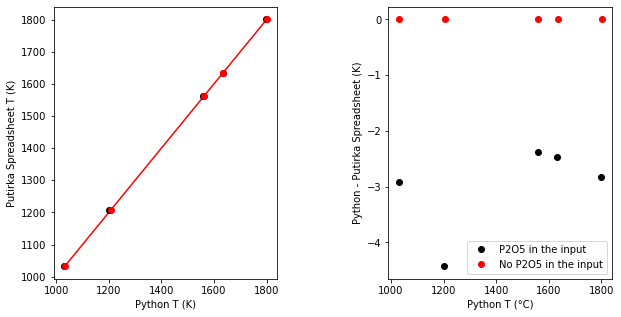

In [59]:
# Performing calculations with P2O5 in the input
Temp_BT_2019=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1, equationT="T_Brug2019")-273.15
# Removing P2O5 from the input
myLiquids1_noP2O5=myLiquids1.copy()
myLiquids1_noP2O5['P2O5_Liq']=0

Temp_BT_2019_NoP205=pt.calculate_cpx_liq_temp(cpx_comps=myCPXs1, liq_comps=myLiquids1_noP2O5, equationT="T_Brug2019")-273.15
#T_Put2008_eq33
#T_BT_2019

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot((np.min(my_input['Temperature_BT_2019']), np.max(my_input['Temperature_BT_2019'])), (np.min(my_input['Temperature_BT_2019']), np.max(my_input['Temperature_BT_2019'])), '-r')
ax1.plot(Temp_BT_2019, my_input['Temperature_BT_2019'], 'ok')
ax2.plot(Temp_BT_2019,Temp_BT_2019-my_input['Temperature_BT_2019'], 'ok', label='P2O5 in the input')
ax1.plot(Temp_BT_2019_NoP205, my_input['Temperature_BT_2019'], 'or')
ax2.plot(Temp_BT_2019_NoP205, Temp_BT_2019_NoP205-my_input['Temperature_BT_2019'], 'or',  label='No P2O5 in the input')

ax1.set_xlabel('Python T (K)')
ax1.set_ylabel('Putirka Spreadsheet T (K)')
ax2.set_xlabel('Python T (°C)')
ax2.set_ylabel('Python - Putirka Spreadsheet (K)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)
plt.legend()
